<center><font size="+4">Programming & Data Analytics & AI 2 PM 2024/2025</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+2">Introduction to </font></center>
<center><font size="+2">Process-oriented Data Science: Process mining</font></center>

---
---

# Course Overview

In this course we will __introduce you to__ the world of __Process Mining__
- Typical data science projects study the data to 
   - Predict properties on future unseen data
   - Classify the data points in groups
   - ...
   
- In this course, instead, we will study the data to 
  - Study the _data generating process_
    - What is the process that generated the data? 
    - What are its main steps? 
    - Is it correct? 
    - Can it be improved?
- Processes are everywhere!
  - When you book an airplan flight several intermediate steps are necessary
    - Identify company
    - Identify flight
    - Book flight
    - Perform payment ...
  - But, really, processes are everywhere. We will study many examples


We hope that after this course it will be clear that
  - a data scientist can turn data into _greater_ value if considering also processes. 


This will be an applied course
  - A lot of examples and analyses
  - Just a few necessary boring presentations of technical details :D
  - You will have to produce a process mining project!

# How are we going to evaluate you?

## Oral examination based on a report on assignments & project
* _Assignments_
    * Similarly to module 1, we provide some simple coding assignments
    * These are to test the topics somehow complementarily to the project work
    * You shall hand in your assignments by the exam date. 
* _Project report_
    * You will be given a simple _classic PM_ dataset
      * Would have you survived the Titanic shipwreck?
      * Or __you can propose one of interest if any__
        - Highly suggested! 
        - Please contact us
        - You can do this only if we explicitly agree
    * You will be asked to do a data-analysis PM project 

* Groups
    * You can form __groups of 3 or 2 students__
       * Both for the assignments and the project
    * We will do a group oral examination based on your assignments and project

## The project
- Once the dataset has been chosen
- __Your task is to analyze this dataset in the lines of what shown in the course__
  - The final goal is to do a PM project studying the data generating process 
    - But we are flexible on this. It depends on the dataset...
    - E.g., if starting from a real-world dataset, it may be necessary to invest plenty of time pre-processing the data...
  - BEWARE: 
    - Try first to understand the data!
    - Not all datasets are the same!
      - Do not just blindly apply all tasks seen in class, with the same parameters. 
      - Try to perform reasoned choices.
      -  You are free to choose part of the techniques/tools seen during the course
         - **Motivate your choices**
  

  - You should prepare a [jupyterLab notebook](https://jupyterlab.readthedocs.io/en/stable/), or colab notebook (which is the same thing) containing your analysis 
      - **Properly commenting/motivating each step with suitable comments**
      - Similarly to what we do in the jupyterLab notebooks we use in our classes
      - Why a notebook?
        - Natural choice if you use pm4py, wghich is a python library
        - An alternative way to create slides if you use third-parties tools, like Disco
          - Please note, PM is an interactive process. You may have to:
            - use python to pre-process the data
            - use disco to analyze it and output refine data
            - use python to process the generated data 
            - use disco to analyses the processed data
            - ....
          - This is why we ask you to create a notebook

## Can I apply process mining to my own data?
- __Yes! Event data are everywhere!.__
- We encourage you to apply the techniques covered in this course to your own data sets, e.g.
  - data from social networks
  - data from information systems of enterprises 
- I personally applied it to
  - Healthcare data
  - Legal data
  - 20+ popular public datasets

In [5]:
url_github_repo_basic="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/"
url_github_repo=url_github_repo_basic+"PDAI/"


print('The slides used today')
slides= url_github_repo + "slides/processMining/ProcessMiningTutorial.pdf"
slides

The slides used today


'https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/slides/processMining/ProcessMiningTutorial.pdf'

# The role of this notebook in this course

In this notebook, and in the connected slides, we give a _hands on_ introduction to Process Mining
- What is a process?
- What is process mining?
- How can we study processes? Why is it important?
- What are pm4py and Disco?

We hope you will have fun in this class and in the whole course!

In [8]:
print('The slides used today')
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/"
print(url_github_repo+"slides/processMining/ProcessMiningTutorial.pdf")

The slides used today
https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/slides/processMining/ProcessMiningTutorial.pdf


# Download files

In [9]:
url = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/PurchasingExample.csv'
url2 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/burgers.csv'

import urllib.request
from pathlib import Path

urllib.request.urlretrieve(url,Path(url).name)
urllib.request.urlretrieve(url2,Path(url2).name)

('burgers.csv', <http.client.HTTPMessage at 0x7ff5a11f00d0>)

# Understanding processes and process mining

## Further material

Part of the material for this section is from [here](https://pm4py.fit.fraunhofer.de/getting-started-page#understanding)

Further material can be found here
- [Disco Tour](https://fluxicon.com/disco/files/Disco-Tour.pdf)
- [Coursera MOOC on Process Mining](https://www.coursera.org/learn/process-mining) (it is for free)
  - You alaso find a preview (4 chapters) of a fundamental book on which the course is based!

## Processes

Most companies execute several _processes_
- A process represents a _structured collection of __activities__, resources and personnel_ necessary to reach a __goal__
- Examples
  - The process to manufacture a car
  - The process to cook a pizza
  - The process to provide a service
  - __The process to deliver burgers operated by a burger restaurant__
  - ....
  

## Burger delivery process

Let us consider the burger example.

### Two process instances

Andrea calls the restaurant McPython's
- From the __CaPythonE__ chain ;)

__Lucy__ handles the order by performing the following __activities__, in this order, involving also the chef __Luigi__, and the delivery boy __Mike__:
<ol>
<li><i><b>Lucy</b> takes your order</i></li>
<li><i><b>Lucy</b> notes down your address</i></li>
<li><i><b>Lucy</b> notes down your preferred payment method</i></li>
<li><i><b>Luigi</b> prepares your burger</i></li>
<li><i><b>Lucy</b> grabs your can of soda</i></li>
<li><i><b>Luigi</b> puts your burger in a box</i></li>
<li><i><b>Lucy</b> wraps your order</i></li>
<li><i><b>Mike</b> delivers your order</i></li>
</ol>

This is an __instance__ of the process, or a __trace__

A few days afterwards, Daniele calls as well the restaurant.

This time, __Randy__ handles the order with the help of the chef __Luigi__ and of the delivery boy __John__:
<ol>
                                    <li><i><b>Randy</b> takes your order</i></li>
                                    <li><i><b>Randy</b> notes down your preferred payment method</i></li>
                                    <li><i><b>Randy</b> notes down your address</i></li>
                                    <li><i><b>Luigi</b> prepares your burger</i></li>
                                    <li><i><b>Luigi</b> puts your burger in a box</i></li>
                                    <li><i><b>Randy</b> wraps your order</i></li>
                                    <li><i><b>John</b> delivers your order</i></li>
                                </ol>
                                
This is another instance of the process, a trace, where
- Daniele did not ask for drinks
- Randy performed certain activities in a different order
  - He first noted down the payment method, and then the address

### Event logs

Several of such process instances are typically collected into one __event log__

A CSV file with
- One row per 'event' (per point 1-8, 1-7 above)
  - An event corresponds to the execution of an activity
- More rows/events per case/instance

This is a very simple event log of the burger restaurant for Andrea's and Daniele's order

In [ ]:
import pandas as pd
burgers_log=pd.read_csv("burgers.csv")
burgers_log

Andrea's order

In [ ]:
burgers_log[burgers_log.case_id==1337]

### Process discovery

Starting from an event log, we can run __discovery algorithms__ from process mining to 
- synthetize a system description (a process) that matches the observed logs

For the event log above we obtain:

In [ ]:
from IPython.display import Image, display
img=Image(url_github_repo+'slides/processMining/actual_simple_sample_model.png',width=1300)
#savefig(img)
display(img)

We can see that 
- 2 of events can be executed in parallel
  - Note address and Register Payment Method
- Grab soda is optional

The above process can be generated using a Python library for Process mining
- [PM4PY](https://pm4py.fit.fraunhofer.de/getting-started-page#understanding)
- However, it is a bit too 'technical' for today's class. 

Today we will focus on a graphical easy-to-use industrial tool
- [Disco](https://fluxicon.com/disco/)
- It focuses on providing more intuitive process descriptions easily understandable by domain experts

Disco's output for the simple event-log is:

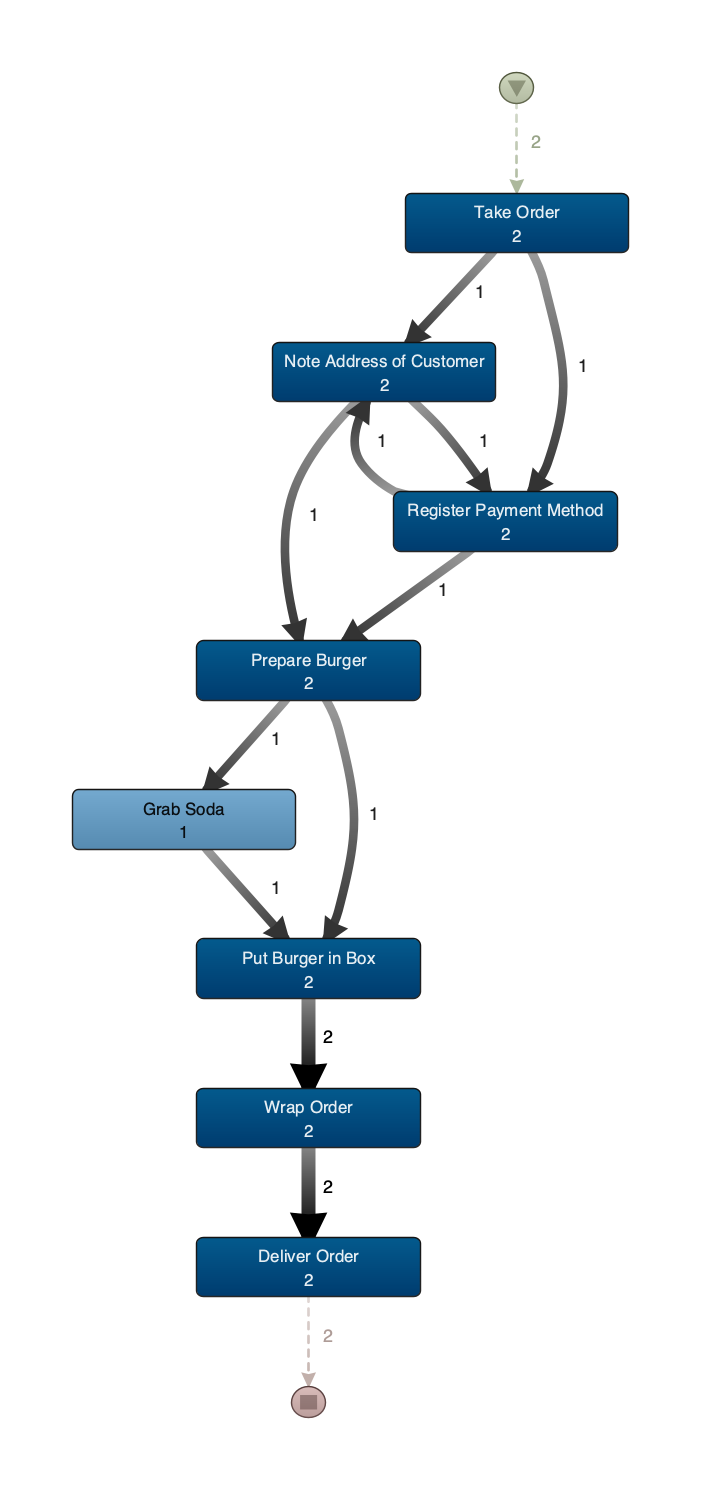

In [10]:
from IPython.display import Image, display
#img=Image(filename='images/tentativeLecturePlan.png',width=700)

img=Image(url_github_repo+'slides/processMining/burgers.png',width=500)
display(img)

# Process discovery with pm4py

> __This example requires you to have [graphviz](https://graphviz.org/download/) installed__

It works on colab

## Install/load libraries

In [ ]:
#The first time you need to install pm4py
%pip install pm4py

In [ ]:
#Now you import pandas and pm4py
import pandas as pd
import pm4py

## Load and inspect data

In [ ]:
file_path="burgers.csv"
event_log = pd.read_csv(file_path, sep=',')

num_events = event_log.shape[0]
num_cases = len(event_log.case_id.unique())
num_activities = len(event_log.activity.unique())
print("Number of events:    {}\nNumber of cases:      {}\nNumber of activities: {}".format(num_events, num_cases,num_activities))
event_log

In [ ]:
event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

## Generate and view BPMN

In [ ]:
process_tree = pm4py.discover_process_tree_inductive(event_log)
#print(process_tree)

#from pm4py.visualization.process_tree import visualizer as pt_visualizer
#gviz = pt_visualizer.apply(process_tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
#pt_visualizer.view(gviz)

bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

## Generate and view Process map (aka dependecy graph, Disco-style)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

## Further material

An application of pm4py to the healthcare domain
- [Part 1](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-1-ae02027a050)
- [Part 2](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-2-4cf57053421f)
- [Part 3](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-3-cc9af986c122)
- [Part 4](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-4-912286ee51b)

# Material for tutorial on Fluxicon Disco

## Load data

In [ ]:
import pandas as pd

In [ ]:
logs = pd.read_csv("PurchasingExample.csv")
logs["Start Timestamp"]=pd.to_datetime(logs["Start Timestamp"])
logs["Complete Timestamp"]=pd.to_datetime(logs["Complete Timestamp"])
logs.sort_values(by="Start Timestamp",inplace=True)

logs

In [ ]:
logs.info()

## Extract the case with ID 1

In [ ]:
logs[logs["Case ID"]==1]

## Extract the case with ID 2

In [ ]:
logs[logs["Case ID"]==2]

## How many cases?

In [ ]:
len(logs["Case ID"].unique())